In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df=pd.read_excel('centralzone(1).xlsx')

In [9]:
df.head()

Region     Area            Timely sown        Seed  \
0  Central Zone (CZ)  Vijapur  Irrigated Timely Sown      GW513*   
1  Central Zone (CZ)  Vijapur  Irrigated Timely Sown     HI1636*   
2  Central Zone (CZ)  Vijapur  Irrigated Timely Sown   GW322 (C)   
3  Central Zone (CZ)  Vijapur  Irrigated Timely Sown  HI1544 (C)   
4  Central Zone (CZ)  Vijapur  Irrigated Timely Sown      MP3535   

   Grain appearance  Hectolitre weight  Protein content  Sedimentation value  \
0               6.4               81.9             11.0                 40.0   
1               6.6               80.8             12.4                 41.1   
2               5.6               80.2             10.8                 40.7   
3               6.4               82.5             12.2                 40.0   
4               6.2               82.7             12.1                 53.8   

   Phenol test  Fe content  Zn content  
0          4.5        35.3        43.3  
1          5.5        36.4        53.8  
2          7.0        32.3        48.8  
3          7.0        33.8        55.6  
4          7.5        38.1        45.3

In [10]:
df.shape

(132, 11)

In [11]:
df.isnull().sum()

Region                 0
Area                   0
Timely sown            0
Seed                   0
Grain appearance       0
Hectolitre weight      0
Protein content        0
Sedimentation value    0
Phenol test            0
Fe content             0
Zn content             0
dtype: int64

In [12]:
df.iloc[:,9:]

Fe content  Zn content
0          35.3        43.3
1          36.4        53.8
2          32.3        48.8
3          33.8        55.6
4          38.1        45.3
..          ...         ...
127        40.0        37.5
128        38.4        40.5
129        36.4        34.4
130        40.3        37.2
131        34.5        34.9

[132 rows x 2 columns]

In [14]:
frame=pd.DataFrame(df.iloc[:,9:])

In [15]:
frame.head()

Fe content  Zn content
0        35.3        43.3
1        36.4        53.8
2        32.3        48.8
3        33.8        55.6
4        38.1        45.3

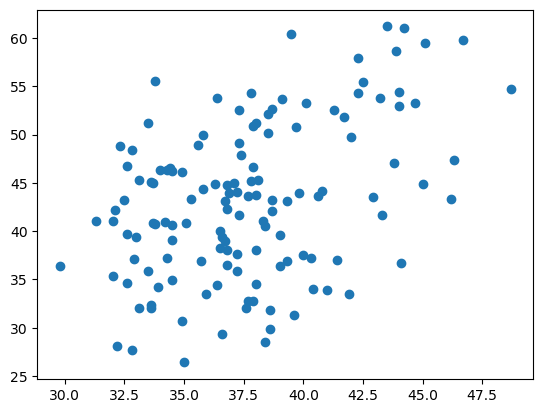

In [16]:
plt.scatter(frame['Fe content'],frame['Zn content'])
plt.show()

In [17]:
from sklearn.cluster import KMeans

In [18]:
k_rng=range(1,14)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(frame[['Fe content','Zn content']])
    sse.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

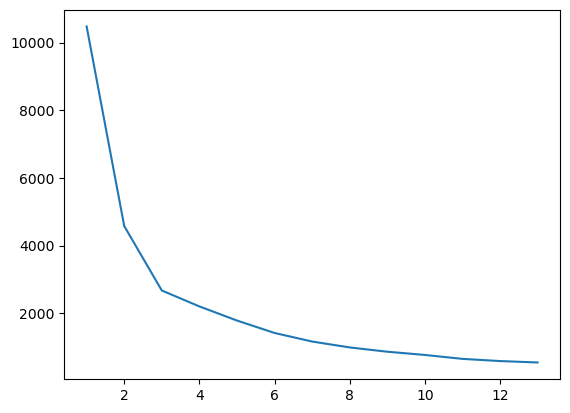

In [19]:
plt.plot(k_rng,sse)
plt.show()

In [20]:
import sklearn.metrics as metrics

In [21]:
kvalue=range(2,12)
sil=[]
for k in kvalue:
    km=KMeans(n_clusters=k)
    labels=km.fit_predict(frame[['Fe content','Zn content']])
    score=metrics.silhouette_score(frame[['Fe content','Zn content']],labels)
    sil.append(score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

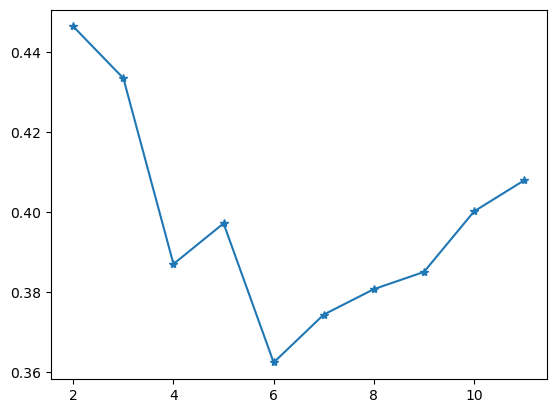

In [22]:

plt.plot(kvalue,sil,marker='*')
plt.show()

In [23]:
km=KMeans(n_clusters=2)
c=km.fit_predict(frame)
c

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [24]:
frame['cluster']=c
frame.head()

Fe content  Zn content  cluster
0        35.3        43.3        1
1        36.4        53.8        0
2        32.3        48.8        0
3        33.8        55.6        0
4        38.1        45.3        0

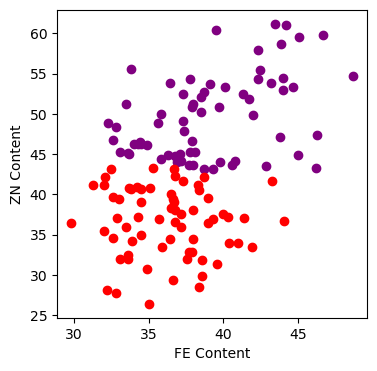

In [25]:
plt.figure(figsize=(4,4))
df1 = frame[frame.cluster==0]
df2 = frame[frame.cluster==1]
plt.scatter(df1['Fe content'],df1['Zn content'],color='purple')
plt.scatter(df2['Fe content'],df2['Zn content'],color='red')
plt.xlabel('FE Content')
plt.ylabel('ZN Content')
plt.show()

In [26]:
df['cluster']=c
df.head(95)

Region      Area                       Timely sown        Seed  \
0   Central Zone (CZ)   Vijapur             Irrigated Timely Sown      GW513*   
1   Central Zone (CZ)   Vijapur             Irrigated Timely Sown     HI1636*   
2   Central Zone (CZ)   Vijapur             Irrigated Timely Sown   GW322 (C)   
3   Central Zone (CZ)   Vijapur             Irrigated Timely Sown  HI1544 (C)   
4   Central Zone (CZ)   Vijapur             Irrigated Timely Sown      MP3535   
..                ...       ...                               ...         ...   
90  Central Zone (CZ)   Vijapur  Restricted Irrigated Timely Sown   UAS475(d)   
91  Central Zone (CZ)   Vijapur  Restricted Irrigated Timely Sown   HI8830(d)   
92  Central Zone (CZ)   Vijapur  Restricted Irrigated Timely Sown    DDW55(d)   
93  Central Zone (CZ)  Junagarh  Restricted Irrigated Timely Sown  DBW110 (C)   
94  Central Zone (CZ)  Junagarh  Restricted Irrigated Timely Sown  MP3288 (C)   

    Grain appearance  Hectolitre weight  Protein content  Sedimentation value  \
0                6.4               81.9             11.0                 40.0   
1                6.6               80.8             12.4                 41.1   
2                5.6               80.2             10.8                 40.7   
3                6.4               82.5             12.2                 40.0   
4                6.2               82.7             12.1                 53.8   
..               ...                ...              ...                  ...   
90               5.8               75.9             15.3                 40.0   
91               6.2               79.4             13.8                 31.9   
92               7.2               83.1             13.9                 36.1   
93               7.4               83.0             14.4                 50.0   
94               7.6               82.7             13.9                 41.9   

    Phenol test  Fe content  Zn content  cluster  
0           4.5        35.3        43.3        1  
1           5.5        36.4        53.8        0  
2           7.0        32.3        48.8        0  
3           7.0        33.8        55.6        0  
4           7.5        38.1        45.3        0  
..          ...         ...         ...      ...  
90          0.0        34.5        39.1        1  
91          0.0        33.0        39.4        1  
92          0.0        33.6        45.1        0  
93          7.0        46.7        59.8        0  
94          7.5        44.0        53.0        0  

[95 rows x 12 columns]

In [27]:
df1.mean()

Fe content    39.063636
Zn content    49.640909
cluster        0.000000
dtype: float64

In [28]:
df2.mean()

Fe content    36.250000
Zn content    36.571212
cluster        1.000000
dtype: float64

In [33]:
import numpy as np
# Calculate the standard deviation
standard_deviation = np.std(df1['Fe content'])

standard_deviation


4.017372741799855

In [34]:
import numpy as np
# Calculate the standard deviation
standard_deviation = np.std(df1['Zn content'])

standard_deviation


5.114832183411573

In [37]:
import numpy as np
# Calculate the standard deviation
standard_deviation = np.std(df2['Fe content'])

standard_deviation


3.0316137316917238

In [38]:
import numpy as np
# Calculate the standard deviation
standard_deviation = np.std(df2['Zn content'])

standard_deviation


4.229398021193